# Covid-19 Modelling with Hyperparameter Optimization (Logistic Regression)

Include all nessacary modules

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

# Loading and Data set description

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics/master/cvd/data.csv",  error_bad_lines=False)
# Data preprocessing
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [6]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [7]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [8]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

 # Data Analysis 

In [9]:
print(data.dtypes)

location           int32
country            int32
gender             int32
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int32
symptom2           int32
symptom3           int32
symptom4           int32
symptom5           int32
symptom6           int32
diff_sym_hos       int64
diff_symp_hos      int64
dtype: object


Training data set

In [10]:
tdata = pd.read_csv('https://raw.githubusercontent.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics/master/cvd/train.csv', error_bad_lines=False)
tdata = tdata.drop('id',axis=1)
tdata = tdata.fillna(np.nan,axis=0)
tdata['age'] = tdata['age'].fillna(value=tdata['age'].mean())
tdata['location'] = encoder.fit_transform(tdata['location'].astype(str))
tdata['country'] = encoder.fit_transform(tdata['country'].astype(str))
tdata['gender'] = encoder.fit_transform(tdata['gender'].astype(str))
tdata[['symptom1']] = encoder.fit_transform(tdata['symptom1'].astype(str))
tdata[['symptom2']] = encoder.fit_transform(tdata['symptom2'].astype(str))
tdata[['symptom3']] = encoder.fit_transform(tdata['symptom3'].astype(str))
tdata[['symptom4']] = encoder.fit_transform(tdata['symptom4'].astype(str))
tdata[['symptom5']] = encoder.fit_transform(tdata['symptom5'].astype(str))
tdata[['symptom6']] = encoder.fit_transform(tdata['symptom6'].astype(str))

In [11]:
tdata['sym_on'] = pd.to_datetime(tdata['sym_on'])
tdata['hosp_vis'] = pd.to_datetime(tdata['hosp_vis'])
tdata['sym_on']= tdata['sym_on'].map(dt.datetime.toordinal)
tdata['hosp_vis']= tdata['hosp_vis'].map(dt.datetime.toordinal)
tdata['diff_sym_hos']= tdata['hosp_vis'] - tdata['sym_on']

In [12]:
tdata = tdata.drop(['sym_on','hosp_vis'],axis=1)
print(tdata)

     location  country  gender        age  vis_wuhan  from_wuhan  death  \
0          38        2       1  61.000000          0           1      1   
1          38        2       1  69.000000          0           1      1   
2          38        2       1  89.000000          0           1      1   
3          38        2       1  89.000000          0           1      1   
4          38        2       1  66.000000          0           1      1   
..        ...      ...     ...        ...        ...         ...    ...   
217         2        3       2  49.747537          0           0      0   
218        22        6       2  49.747537          0           0      1   
219        22        6       2  49.747537          0           0      1   
220        22        6       2  49.747537          0           0      1   
221        22        6       2  49.747537          0           0      1   

     symptom1  symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0           9      

In [13]:
print(tdata.isna().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [14]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

# Train using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [16]:
X = tdata[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = tdata['death']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [18]:
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

C:\Users\rawin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rawin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation metrics, including accuracy, precision, recall and F1 Score

In [19]:
pred = np.array(classifier.predict(X_test))

recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [20]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.6666666666666666
F1 Score:  0.6956521739130435
Accuracy:  0.8444444444444444

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


-------------------------------------------------------------------------------

# Results

Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

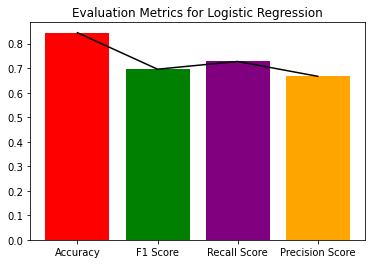

In [21]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr,f1_lr,recall_lr,precision_lr],color=['red','green','purple','orange'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for Logistic Regression')

In [22]:
print(pd.DataFrame({'Val':Y_test,'Pred':classifier.predict(X_test)}))

     Val  Pred
184    0     0
170    1     0
142    0     0
182    0     0
49     1     1
117    0     0
63     1     0
144    0     0
35     1     1
101    0     0
24     1     1
200    0     0
129    0     0
26     1     1
116    0     0
76     0     0
99     0     0
47     1     1
70     0     0
121    0     0
146    0     0
220    1     1
60     0     1
188    0     0
19     1     0
98     0     0
87     0     0
68     0     0
131    0     0
194    0     1
197    0     0
195    0     0
166    0     0
78     0     0
59     0     1
187    0     0
58     0     1
148    0     0
20     1     1
127    0     0
5      1     1
83     0     0
69     0     0
160    0     0
95     0     0


# Hyperparamter optimisation

In [24]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' : [80, 80,80, 80]
    }
]

In [25]:
clf = GridSearchCV(classifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [26]:
best_clf = clf.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    7.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.7s finished
C:\Users\rawin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rawin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
best_clf.best_estimator_

LogisticRegression(max_iter=80, penalty='none')

In [37]:
classifier = LogisticRegression(max_iter =80)

In [38]:
classifier.fit(X_train,np.array(Y_train).reshape(Y_train.shape[0],1))

C:\Users\rawin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rawin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=80)

Evaluation metrics, including accuracy, precision, recall and F1 Score

In [39]:
pred = np.array(classifier.predict(X_test))

recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [40]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(Y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7272727272727273
Precision Score:  0.7272727272727273
F1 Score:  0.7272727272727273
Accuracy:  0.8666666666666667

	Table 3

     death  pred
184      0     0
170      1     0
142      0     0
182      0     0
49       1     1


-------------------------------------------------------------------------------

Results

Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

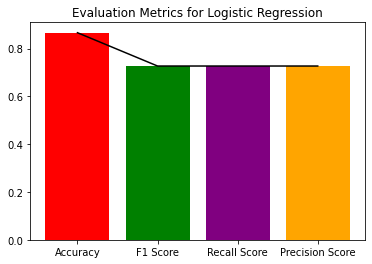

In [41]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr,f1_lr,recall_lr,precision_lr],color=['red','green','purple','orange'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for Logistic Regression')

In [42]:
print(pd.DataFrame({'Val':Y_test,'Pred':classifier.predict(X_test)}))

     Val  Pred
184    0     0
170    1     0
142    0     0
182    0     0
49     1     1
117    0     0
63     1     0
144    0     0
35     1     1
101    0     0
24     1     1
200    0     0
129    0     0
26     1     1
116    0     0
76     0     0
99     0     0
47     1     1
70     0     0
121    0     0
146    0     0
220    1     1
60     0     1
188    0     0
19     1     0
98     0     0
87     0     0
68     0     0
131    0     0
194    0     1
197    0     0
195    0     0
166    0     0
78     0     0
59     0     1
187    0     0
58     0     0
148    0     0
20     1     1
127    0     0
5      1     1
83     0     0
69     0     0
160    0     0
95     0     0
